In [1]:
import os
import h5py
import json
import keras
import random 
import imageio
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import backend as K
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

Using TensorFlow backend.


In [2]:
Data = pd.read_csv('DsDnsPrScTch.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

In [4]:
Data.dtypes

Unnamed: 0                                       int64
Project ID                                      object
Donation ID                                     object
Donor ID                                        object
Donation Included Optional Donation             object
Donation Amount                                float64
Donor Cart Sequence                              int64
Donation Received Date                  datetime64[ns]
Donor City                                      object
Donor State                                     object
Donor Is Teacher                                object
Donor Zip                                       object
School ID                                       object
Teacher ID                                      object
Teacher Project Posted Sequence                  int64
Project Type                                    object
Project Title                                   object
Project Essay                                   object
Project Sh

count    1.109992e+06
mean     3.098366e-01
std      3.482400e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.422162e-01
75%      5.096331e-01
max      2.550013e+00
Name: Raised funds to project cost ratio, dtype: float64


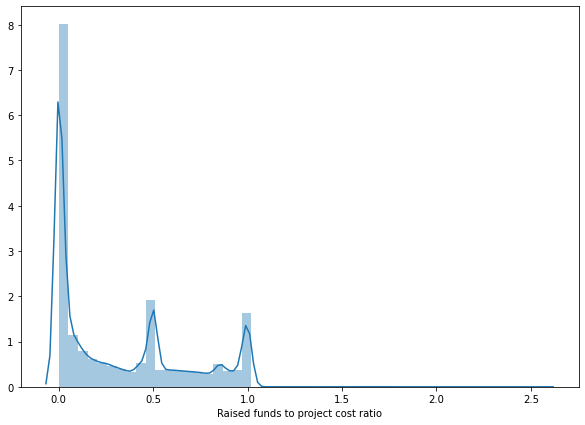

In [5]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())


count    1.109992e+06
mean     3.629093e-01
std      3.632145e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.574711e-01
75%      6.419432e-01
max      2.550013e+00
Name: Raised funds to project cost ratio, dtype: float64


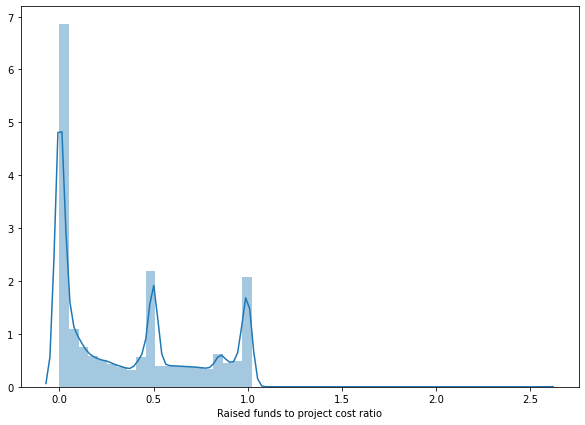

In [6]:
T=pd.Timedelta('60 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G60=Grouped_data_Final

count    1.109992e+06
mean     3.961107e-01
std      3.694745e-01
min      0.000000e+00
25%      6.611498e-03
50%      3.638901e-01
75%      7.204591e-01
max      2.550013e+00
Name: Raised funds to project cost ratio, dtype: float64


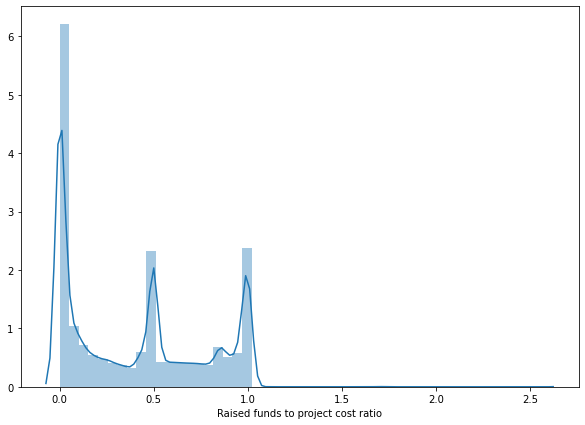

In [7]:
T=pd.Timedelta('90 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G90=Grouped_data_Final

count    1.109992e+06
mean     4.361497e-01
std      3.761504e-01
min      0.000000e+00
25%      2.408777e-02
50%      4.700199e-01
75%      8.165160e-01
max      2.550013e+00
Name: Raised funds to project cost ratio, dtype: float64


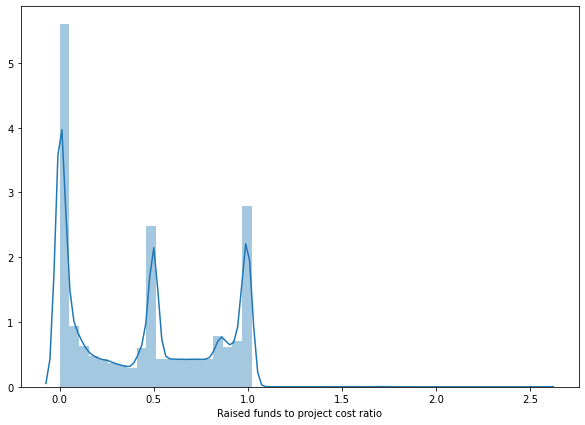

In [8]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G120=Grouped_data_Final

In [9]:
#===============================================================================================
#                                  Model Training Funstion
#===============================================================================================

def Train_Model(Classifier, Model_variables_con,Model_variables_cat,Data,
                Time_period_indays=30,K=100,Fund_Ratio_treshold=0.142):
    # Time_period should be in days 
    # K is the Top-K value

    #=================================== Initiate the List Variables ================================
    
    Time_points = []
    Output=dict()
    Output["Overall_Training_Accuracy"], Output["Overall_Training_Precision"], Output["Overall_Training_Recall"] = list(),list(),list()
    Output["Overall_Testing_Accuracy"], Output["Overall_Testing_Precision"], Output["Overall_Testing_Recall"] = list(),list(),list()
    Output["Top_K_Accuracy"], Output["Top_K_Precision"], Output["Top_K_Recall"] = list(),list(),list()

    #=================================== Initiate the Columns ======================================
    
    print("Initiatnig the Columns")
    Main_Variables = list(set(["Project ID","Project Posted Date","Project Expiration Date","Donation Received Date",
         "Project Cost","Donation Amount","Number of dates since posted"]+Model_variables_cat+Model_variables_con))
    Model_variables = Model_variables_con.copy()
    print("Variables considered in model training")
    for i in sub_var: print(">",i,i in Data.columns) # print all variables considered.
    print()
    Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]
    sub_Data = Data.loc[:,Main_Variables]
    

    #================================= One-Hot-Encoding Columns to remove ==========================
    
    print("One-Hot-Encoding removing columns identification")
    Sub_Variables_to_remove=dict()
    for i in Model_variables_cat:
        sub_variables = Data[i].unique()
        Model_variables+=sorted([i+"_"+str(j) for j in Data[i].unique()])
        Model_variables.remove(i+"_"+str(sub_variables[0]))
        Sub_Variables_to_remove[i]=sub_variables[0]
        
    
    #=================================== Initiate Time Variables ====================================
    
    print("Initiate Time Variables")
    MaxT = pd.Timestamp("2018-05-01 00:00:00")  #max(Data["Project Posted Date"])
    MinT = pd.Timestamp("2013-01-01 00:00:00")  #min(Data["Project Posted Date"])
    Time_period = timedelta(days=Time_period_indays)  
    T_current = MinT- Time_period +timedelta(days=120) 
    sub_Data["Number of dates since posted"] = sub_Data["Number of dates since posted"]/ np.timedelta64(1, 'D')
    
    
    #=================================== Loop over time frams =======================================
    
    print("Time iteration is starting\n")
    while (T_current<MaxT-Time_period):
        
        T_current = T_current+ Time_period
        Time_points+=[T_current]
        T_Train_start = T_current-timedelta(days=120)  # Start of the data frame
        T_Train_end = T_current-Time_period  #End of the data frame
        print("As of Date:",T_current,"\n"+"="*85)
        
    #====================================== Extract the frams ======================================= 
    
        # Extracts projects posted before the Current(As of) date
        Data_in_TimeWindow = sub_Data[sub_Data["Project Posted Date"] < pd.to_datetime(T_current)]  
        
        # Extracts projects posted after the start date of the Time window
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] > pd.to_datetime(T_Train_start)]
        
        #Time period to be consided for the donations since posted (30days, as default)
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Number of dates since posted"]< Time_period_indays]
        
        #Express the donation amount as a ratio of to the Project cost
        Data_in_TimeWindow["Fund_Ratio"]=Data_in_TimeWindow["Donation Amount"]/Data_in_TimeWindow["Project Cost"]
        
        
    #=========================== Do One-Hot_Encoding for Categorical Variables ======================
    
        for var in Model_variables_cat:
            Sub_Dummied_Data=pd.get_dummies(Data_in_TimeWindow[var])  #create dummpy variables with one hot encoding 
            Sub_Dummied_Data_columns=sorted(Sub_Dummied_Data.columns)  #extract the column names of dummpy variables
            Sub_Dummied_Data_columns.remove(Sub_Variables_to_remove[var]) #remove a pre defined column from dummpy variables
            Data_in_TimeWindow=Data_in_TimeWindow.drop([var], axis=1) #remove main variable from the dataset
            #copy the columns to the main data set 
            for col in Sub_Dummied_Data_columns : Data_in_TimeWindow[var+"_"+col] = Sub_Dummied_Data[col]
                
        #Add the columns which have not been one-hot-encoded
        for i in Model_variables:
            if i not in Data_in_TimeWindow.columns:  Data_in_TimeWindow[i]=0
    
    
    #============================================ Imputing ==========================================
        Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)
                
    
    #=================================== Training set Creation =====================================
    
        #extract the training set from the timewindow
        Train_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] < pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Train_Data_CR=Train_Data.groupby(["Project ID"]).sum() 
        Train_Data_Final=Train_Data.groupby(["Project ID"]).max()
        Train_Data_Final["Fund_Ratio"]=Train_Data_CR["Fund_Ratio"]
        Train_Data_Final["Donation Amount"]=Train_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Train_Data_Final['Label'] = Train_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                           Fund_Ratio_treshold  else 0, axis=1)
        
        X_train = Train_Data_Final.loc[:,Model_variables]
        Y_train = np.array(Train_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #==================================== Testing set Creation =====================================
    
        #extract the training set from the timewindow
        Test_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] >= pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Test_Data_CR=Test_Data.groupby(["Project ID"]).sum() 
        Test_Data_Final=Test_Data.groupby(["Project ID"]).max()
        Test_Data_Final["Fund_Ratio"]=Test_Data_CR["Fund_Ratio"]
        Test_Data_Final["Donation Amount"]=Test_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Test_Data_Final['Label'] = Test_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                         Fund_Ratio_treshold  else 0, axis=1)
        X_test = Test_Data_Final.loc[:,Model_variables]
        Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #===================================== Model Training =========================================
    
        Classifier.fit(X_train, Y_train)
        
        # Predict on training 
        Train_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_train)[:,1]
        Train_Data_Final["Y_pred"]= Classifier.predict(X_train)
        # Predict on testing 
        Test_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_test)[:,1]
        Test_Data_Final["Y_pred"] = Classifier.predict(X_test)

        
    #====================================== Evaluation Trainign  ============================================
    
        Training_CM= confusion_matrix(Y_train,Train_Data_Final["Y_pred"])
        Training_TN, Training_FP ,Training_FN, Training_TP =  Training_CM.ravel()
        
        Training_Accuracy=(Training_TP+Training_TN)/(Training_TN+ Training_FP +Training_FN+ Training_TP)
        Training_Precision=Training_TP/(Training_TP+Training_FP)
        Training_Recall=Training_TP/(Training_TP+Training_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Training_Accuracy)
        print("\tTraining_TP:",Training_TP,"\tTraining_FP:",Training_FP,
              "\n\tTraining_TN:",Training_TN,"\tTraining_FN:",Training_FN ,end="\n"*2)
        
        
    #====================================== Evaluation Testign  ============================================   
    
        Testing_CM= confusion_matrix(Y_test,Test_Data_Final["Y_pred"])
        Testing_TN, Testing_FP ,Testing_FN, Testing_TP =  Testing_CM.ravel()
        
        Testing_Accuracy=(Testing_TP+Testing_TN)/(Testing_TN+ Testing_FP +Testing_FN+ Testing_TP)
        Testing_Precision=Testing_TP/(Testing_TP+Testing_FP)
        Testing_Recall=Testing_TP/(Testing_TP+Testing_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Accuracy)
        print("\tTesting_TP:",Testing_TP,"\tTesting_FP:",Testing_FP,
              "\n\tTesting_TN:",Testing_TN,"\tTesting_FN:",Testing_FN ,end="\n"*2)
        
    #====================================== Evaluation Top K  ============================================        
        
        Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
        Top_K=Test_Data_Final.head(K)
        Y_test_Top_K =  Top_K.loc[:,["Label"]] 
        Y_pred_Top_K =  Top_K.loc[:,["Y_pred"]]
        Testing_Top_K_CM= confusion_matrix(Y_test_Top_K,Y_pred_Top_K)
        Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP =  Testing_Top_K_CM.ravel()
        
        Testing_Top_K_Accuracy=(Testing_Top_K_TP+Testing_Top_K_TN)/(Testing_Top_K_TN
                                                                    + Testing_Top_K_FP +Testing_Top_K_FN+ Testing_Top_K_TP)
        Testing_Top_K_Precision=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FP)
        Testing_Top_K_Recall=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Top_K_Accuracy)
        print("\tTesting_Top_K_TP:",Testing_Top_K_TP,"\tTesting_Top_K_FP:",Testing_Top_K_FP,
              "\n\tTesting_Top_K_TN:",Testing_Top_K_TN,"\tTesting_Top_K_FN:",Testing_Top_K_FN ,end="\n"*2)
        
     #====================================== save computed values  ============================================       
        Output["Overall_Training_Accuracy"] += [Training_Accuracy]
        Output["Overall_Training_Precision"] += [Training_Precision]
        Output["Overall_Training_Recall"] += [Training_Recall ]
        
        Output["Overall_Testing_Accuracy"] += [Testing_Accuracy]
        Output["Overall_Testing_Precision"] += [Testing_Precision]
        Output["Overall_Testing_Recall"] += [Testing_Recall]
        
        Output["Top_K_Accuracy"] += [Testing_Top_K_Accuracy] 
        Output["Top_K_Precision"] += [Testing_Top_K_Precision]  
        Output["Top_K_Recall"] += [Testing_Top_K_Recall] 
    
    
    Output["Classifier"]=Classifier
    Output["Model_variables"]=Model_variables
    Output["Time_points"]=Time_points
    return Output,Test_Data_Final,Train_Data_Final
        

In [10]:
Model_variables_con= ["Project Cost","Number of dates since posted","School Percentage Free Lunch","Project Cost"]
Model_variables_cat= ["School Metro Type","Teacher Prefix","Project Grade Level Category"]

Output,Test_Data_Final,Train_Data_Final= Train_Model(LogisticRegression(random_state=9), Model_variables_con,Model_variables_cat,
                                    Data,Time_period_indays=30,K=100,Fund_Ratio_treshold=0.03)

Initiatnig the Columns
Variables considered in model training
> Number of dates since posted True
> Project ID True
> Donation Amount True
> Project Cost True
> Project Posted Date True
> Project Expiration Date True
> Donation Received Date True

One-Hot-Encoding removing columns identification
Initiate Time Variables
Time iteration is starting

As of Date: 2013-05-01 00:00:00 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8795443634617902
	Training_TP: 7552 	Training_FP: 2097 
	Training_TN: 12601 	Training_FN: 663

LogisticRegression  Testing Accuracy =  0.881638846737481
	Testing_TP: 1865 	Testing_FP: 502 
	Testing_TN: 3364 	Testing_FN: 200

LogisticRegression  Testing Accuracy =  0.87
	Testing_Top_K_TP: 87 	Testing_Top_K_FP: 13 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-05-31 00:00:00 
LogisticRegression  Testing Accuracy =  0.8818083556558108
	Training_TP: 6698 	Training_FP: 1847 
	Training_TN: 12066 	Training_FN: 668

LogisticRegression  Testing Accuracy =  0.8794693415304967
	Testing_TP: 2136 	Testing_FP: 523 
	Testing_TN: 3300 	Testing_FN: 222

LogisticRegression  Testing Accuracy =  0.84
	Testing_Top_K_TP: 84 	Testing_Top_K_FP: 16 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-06-30 00:00:00 
LogisticRegression  Testing Accuracy =  0.8752078974193894
	Training_TP: 5925 	Training_FP: 1711 
	Training_TN: 10388 	Training_FN: 6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8474697077690663
	Training_TP: 6445 	Training_FP: 2117 
	Training_TN: 9012 	Training_FN: 665

LogisticRegression  Testing Accuracy =  0.8834115805946792
	Testing_TP: 3015 	Testing_FP: 666 
	Testing_TN: 3759 	Testing_FN: 228

LogisticRegression  Testing Accuracy =  0.77
	Testing_Top_K_TP: 77 	Testing_Top_K_FP: 23 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-08-29 00:00:00 
LogisticRegression  Testing Accuracy =  0.8503295265885193
	Training_TP: 7573 	Training_FP: 2290 
	Training_TN: 9329 	Training_FN: 685

LogisticRegression  Testing Accuracy =  0.8646144421471782
	Testing_TP: 3557 	Testing_FP: 1330 
	Testing_TN: 7734 	Testing_FN: 438

LogisticRegression  Testing Accuracy =  0.71
	Testing_Top_K_TP: 71 	Testing_Top_K_FP: 29 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2013-09-28 00:00:00 
LogisticRegression  Testing Accuracy =  0.8686725399432582
	Training_TP: 8977 	Training_FP: 2605 
	Training_TN: 14293 	Training_FN: 9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8474636997925702
	Training_TP: 20818 	Training_FP: 5930 
	Training_TN: 24123 	Training_FN: 2159

LogisticRegression  Testing Accuracy =  0.833440170940171
	Testing_TP: 2395 	Testing_FP: 1308 
	Testing_TN: 5406 	Testing_FN: 251

LogisticRegression  Testing Accuracy =  0.42
	Testing_Top_K_TP: 42 	Testing_Top_K_FP: 58 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-01-26 00:00:00 
LogisticRegression  Testing Accuracy =  0.8545530902218801
	Training_TP: 16137 	Training_FP: 4660 
	Training_TN: 20490 	Training_FN: 1574

LogisticRegression  Testing Accuracy =  0.8395975482826413
	Testing_TP: 2608 	Testing_FP: 1104 
	Testing_TN: 4652 	Testing_FN: 283

LogisticRegression  Testing Accuracy =  0.9
	Testing_Top_K_TP: 90 	Testing_Top_K_FP: 10 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-02-25 00:00:00 
LogisticRegression  Testing Accuracy =  0.8727510631337912
	Training_TP: 10666 	Training_FP: 3000 
	Training_TN: 18682 	Training

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8894778690697058
	Training_TP: 7456 	Training_FP: 1737 
	Training_TN: 16036 	Training_FN: 1182

LogisticRegression  Testing Accuracy =  0.886996699669967
	Testing_TP: 2989 	Testing_FP: 450 
	Testing_TN: 3730 	Testing_FN: 406

LogisticRegression  Testing Accuracy =  0.91
	Testing_Top_K_TP: 91 	Testing_Top_K_FP: 9 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-07-25 00:00:00 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8595890410958904
	Training_TP: 7652 	Training_FP: 2244 
	Training_TN: 11675 	Training_FN: 913

LogisticRegression  Testing Accuracy =  0.8861979488446806
	Testing_TP: 2895 	Testing_FP: 586 
	Testing_TN: 4277 	Testing_FN: 335

LogisticRegression  Testing Accuracy =  0.93
	Testing_Top_K_TP: 93 	Testing_Top_K_FP: 7 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-08-24 00:00:00 
LogisticRegression  Testing Accuracy =  0.8543726724027225
	Training_TP: 8618 	Training_FP: 2500 
	Training_TN: 11341 	Training_FN: 902

LogisticRegression  Testing Accuracy =  0.80388223174104
	Testing_TP: 4265 	Testing_FP: 3058 
	Testing_TN: 10561 	Testing_FN: 559

LogisticRegression  Testing Accuracy =  0.92
	Testing_Top_K_TP: 92 	Testing_Top_K_FP: 8 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2014-09-23 00:00:00 
LogisticRegression  Testing Accuracy =  0.8890788504053059
	Training_TP: 10078 	Training_FP: 2462 
	Training_TN: 20084 	Training_FN: 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.885083760895098
	Training_TP: 7213 	Training_FP: 1715 
	Training_TN: 21423 	Training_FN: 2003

LogisticRegression  Testing Accuracy =  0.8617971623751971
	Testing_TP: 2643 	Testing_FP: 896 
	Testing_TN: 7197 	Testing_FN: 682

LogisticRegression  Testing Accuracy =  0.96
	Testing_Top_K_TP: 96 	Testing_Top_K_FP: 4 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-04-21 00:00:00 
LogisticRegression  Testing Accuracy =  0.8912564290962528
	Training_TP: 8165 	Training_FP: 2045 
	Training_TN: 22160 	Training_FN: 1655

LogisticRegression  Testing Accuracy =  0.8973878758008872
	Testing_TP: 2819 	Testing_FP: 520 
	Testing_TN: 6285 	Testing_FN: 521

LogisticRegression  Testing Accuracy =  0.97
	Testing_Top_K_TP: 97 	Testing_Top_K_FP: 3 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-05-21 00:00:00 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8832012168368093
	Training_TP: 8382 	Training_FP: 2208 
	Training_TN: 21812 	Training_FN: 1785

LogisticRegression  Testing Accuracy =  0.8881317433276548
	Testing_TP: 3073 	Testing_FP: 409 
	Testing_TN: 4747 	Testing_FN: 576

LogisticRegression  Testing Accuracy =  0.96
	Testing_Top_K_TP: 96 	Testing_Top_K_FP: 4 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-06-20 00:00:00 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8763947640142558
	Training_TP: 8993 	Training_FP: 2483 
	Training_TN: 17319 	Training_FN: 1228

LogisticRegression  Testing Accuracy =  0.8881829733163914
	Testing_TP: 3285 	Testing_FP: 540 
	Testing_TN: 4404 	Testing_FN: 428

LogisticRegression  Testing Accuracy =  0.89
	Testing_Top_K_TP: 89 	Testing_Top_K_FP: 11 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-07-20 00:00:00 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8586146833191268
	Training_TP: 9435 	Training_FP: 2797 
	Training_TN: 13733 	Training_FN: 1018

LogisticRegression  Testing Accuracy =  0.8944881889763779
	Testing_TP: 2737 	Testing_FP: 557 
	Testing_TN: 4079 	Testing_FN: 247

LogisticRegression  Testing Accuracy =  0.98
	Testing_Top_K_TP: 98 	Testing_Top_K_FP: 2 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-08-19 00:00:00 
LogisticRegression  Testing Accuracy =  0.8574242302435887
	Training_TP: 9448 	Training_FP: 2710 
	Training_TN: 11883 	Training_FN: 837

LogisticRegression  Testing Accuracy =  0.8742654093207599
	Testing_TP: 3767 	Testing_FP: 1412 
	Testing_TN: 9027 	Testing_FN: 428

LogisticRegression  Testing Accuracy =  0.9
	Testing_Top_K_TP: 90 	Testing_Top_K_FP: 10 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2015-09-18 00:00:00 
LogisticRegression  Testing Accuracy =  0.8812064814212273
	Training_TP: 9873 	Training_FP: 2697 
	Training_TN: 17210 	Training_FN: 

LogisticRegression  Testing Accuracy =  0.8730522972903755
	Training_TP: 40308 	Training_FP: 9709 
	Training_TN: 44915 	Training_FN: 2683

LogisticRegression  Testing Accuracy =  0.8667080324909747
	Testing_TP: 7227 	Testing_FP: 1834 
	Testing_TN: 8138 	Testing_FN: 529

LogisticRegression  Testing Accuracy =  0.89
	Testing_Top_K_TP: 89 	Testing_Top_K_FP: 11 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2016-12-11 00:00:00 
LogisticRegression  Testing Accuracy =  0.8698512947120629
	Training_TP: 37211 	Training_FP: 8992 
	Training_TN: 38540 	Training_FN: 2342

LogisticRegression  Testing Accuracy =  0.8523113207547169
	Testing_TP: 6714 	Testing_FP: 2297 
	Testing_TN: 11355 	Testing_FN: 834

LogisticRegression  Testing Accuracy =  0.92
	Testing_Top_K_TP: 92 	Testing_Top_K_FP: 8 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2017-01-10 00:00:00 
LogisticRegression  Testing Accuracy =  0.8574656460389192
	Training_TP: 25706 	Training_FP: 7201 
	Training_TN: 30079 	Traini

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8768441196938065
	Training_TP: 15960 	Training_FP: 4367 
	Training_TN: 34441 	Training_FN: 2712

LogisticRegression  Testing Accuracy =  0.8763428827215757
	Testing_TP: 4460 	Testing_FP: 1473 
	Testing_TN: 11202 	Testing_FN: 737

LogisticRegression  Testing Accuracy =  0.84
	Testing_Top_K_TP: 84 	Testing_Top_K_FP: 16 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2017-04-10 00:00:00 
LogisticRegression  Testing Accuracy =  0.8790123910725448
	Training_TP: 13193 	Training_FP: 3312 
	Training_TN: 34620 	Training_FN: 3269

LogisticRegression  Testing Accuracy =  0.8831623717788342
	Testing_TP: 5113 	Testing_FP: 1139 
	Testing_TN: 12537 	Testing_FN: 1196

LogisticRegression  Testing Accuracy =  0.87
	Testing_Top_K_TP: 87 	Testing_Top_K_FP: 13 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2017-05-10 00:00:00 
LogisticRegression  Testing Accuracy =  0.8783682122828614
	Training_TP: 13996 	Training_FP: 3471 
	Training_TN: 37378 	Tra

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.8842681258549931
	Training_TP: 12983 	Training_FP: 2958 
	Training_TN: 32265 	Training_FN: 2964

LogisticRegression  Testing Accuracy =  0.8714812085482683
	Testing_TP: 4427 	Testing_FP: 750 
	Testing_TN: 7399 	Testing_FN: 994

LogisticRegression  Testing Accuracy =  0.94
	Testing_Top_K_TP: 94 	Testing_Top_K_FP: 6 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2017-07-09 00:00:00 
LogisticRegression  Testing Accuracy =  0.8816234255571106
	Training_TP: 14000 	Training_FP: 3468 
	Training_TN: 26947 	Training_FN: 2030

LogisticRegression  Testing Accuracy =  0.8888817023478429
	Testing_TP: 4639 	Testing_FP: 1004 
	Testing_TN: 9104 	Testing_FN: 714

LogisticRegression  Testing Accuracy =  0.95
	Testing_Top_K_TP: 95 	Testing_Top_K_FP: 5 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0

As of Date: 2017-08-08 00:00:00 
LogisticRegression  Testing Accuracy =  0.8735795454545454
	Training_TP: 13665 	Training_FP: 3831 
	Training_TN: 23235 	Training_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Testing Accuracy =  0.875826092277567
	Training_TP: 13981 	Training_FP: 2999 
	Training_TN: 43270 	Training_FN: 5118

LogisticRegression  Testing Accuracy =  0.8350556144720941
	Testing_TP: 15121 	Testing_FP: 2031 
	Testing_TN: 18738 	Testing_FN: 4657

LogisticRegression  Testing Accuracy =  0.98
	Testing_Top_K_TP: 98 	Testing_Top_K_FP: 2 
	Testing_Top_K_TN: 0 	Testing_Top_K_FN: 0



In [11]:
Output.keys()

dict_keys(['Overall_Training_Accuracy', 'Overall_Training_Precision', 'Overall_Training_Recall', 'Overall_Testing_Accuracy', 'Overall_Testing_Precision', 'Overall_Testing_Recall', 'Top_K_Accuracy', 'Top_K_Precision', 'Top_K_Recall', 'Classifier', 'Model_variables', 'Time_points'])

Text(0.5, 1.0, 'Precision-Recall curve')

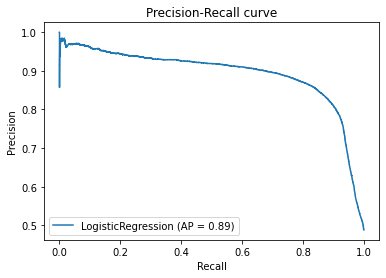

In [12]:
X_test = Test_Data_Final.loc[:,Output["Model_variables"]]
Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]

disp = plot_precision_recall_curve(Output["Classifier"], X_test, Y_test)
disp.ax_.set_title('Precision-Recall curve')

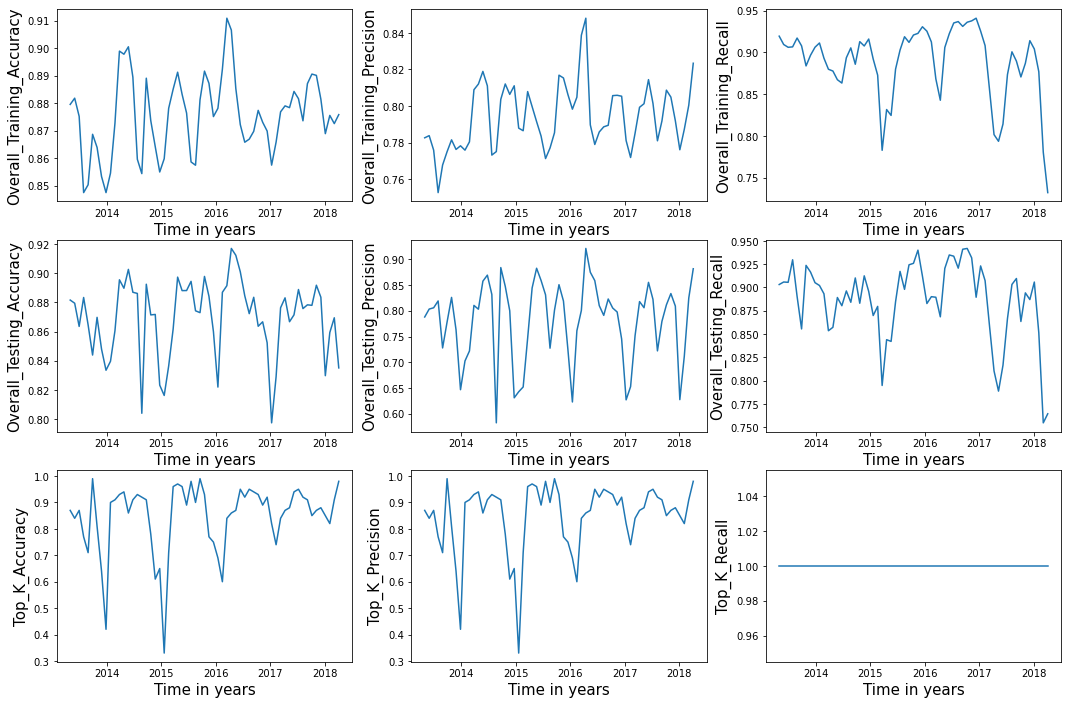

In [13]:
n_cols=3
n_rows=3
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))

ax = axs[0][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Accuracy",fontsize=15);

ax = axs[0][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Precision",fontsize=15);

ax = axs[0][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Recall",fontsize=15);

ax = axs[1][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Accuracy",fontsize=15);

ax = axs[1][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Precision",fontsize=15);

ax = axs[1][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Recall",fontsize=15);

ax = axs[2][0]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Accuracy",fontsize=15);

ax = axs[2][1]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Precision",fontsize=15);

ax = axs[2][2]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Recall",fontsize=15);

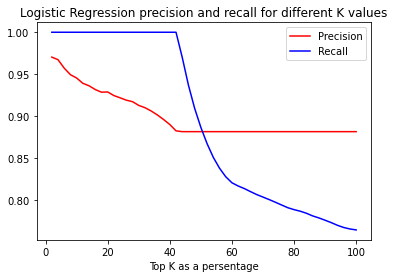

In [14]:
prT=[]
reT=[]
t=[]
k=2
Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
while (k<=100):
    Tk=Test_Data_Final.head(int(len(Test_Data_Final)*k/100))
    Y_test_k =  Tk.loc[:,["Label"]] 
    Y_pred_k =  Tk.loc[:,["Y_pred"]] 
    cm= confusion_matrix(Y_test_k,Y_pred_k)
    if len(cm.ravel())==4:TN, FP ,FN, TP =  cm.ravel()
    else: TN, FP ,FN, TP=0,0,0,100
    t+=[k]
#     print(len(Y_test_k[Y_test_k["Label"]==1])/len(Tk))
    preci=TP/(TP+FP)
    prT+=[preci]
    rec=TP/(TP+FN)
    reT+=[rec]
    k+=2
ax1=plt.plot(t,prT, 'r',label='Precision')
ax2=plt.plot(t,reT, 'b',label='Recall')
plt.xlabel("Top K as a persentage")
plt.title("Logistic Regression precision and recall for different K values")
plt.legend()
plt.show()

Intercept 0.12036884034824172
Prediction_local [-0.26847524]
Right: 0


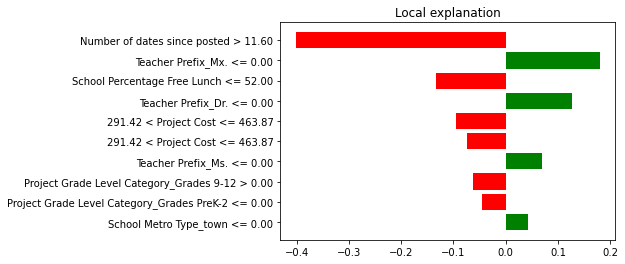

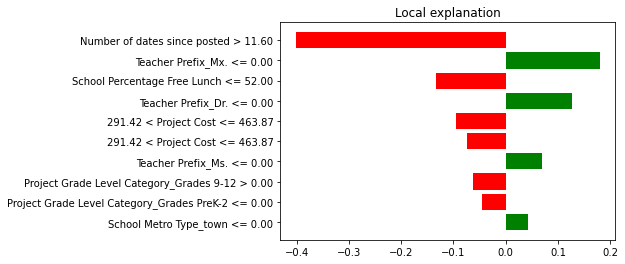

In [15]:
import lime
import lime.lime_tabular

X_train = Train_Data_Final.loc[:,Output["Model_variables"]]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=Output["Model_variables"], 
                    class_names=['Label'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

exp = explainer.explain_instance(X_test.iloc[-1], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [16]:
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.10505474518677815
Prediction_local [0.75206807]
Right: 1


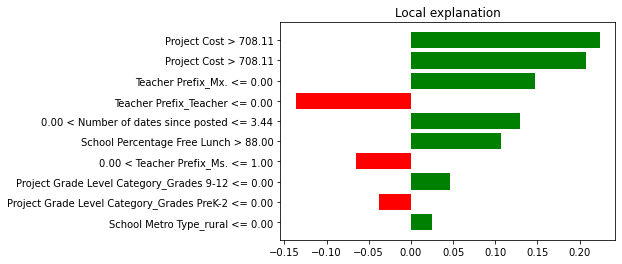

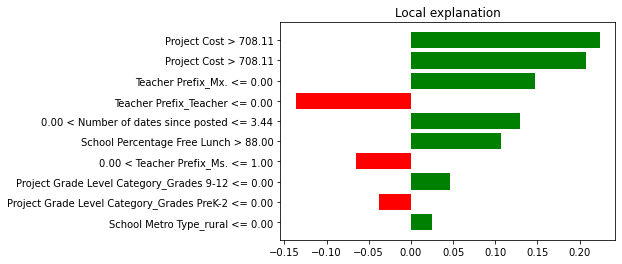

In [17]:
exp = explainer.explain_instance(X_test.iloc[0], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [18]:
exp.show_in_notebook(show_table=True, show_all=False)